In [46]:
import logging
from typing import Optional

import matplotlib.pyplot as plt
import anndata
from scipy.sparse import csr_matrix

# Obtain a pre-defined logger
logger = logging.getLogger(__name__)


def create_histogram_from_adata(
    adata: anndata.AnnData,
    expression_key: str = "X",
    bins: int = 50,
    svg_output: Optional[str] = None,
    label_fontsize: int = 14,
    tick_fontsize: int = 12,
) -> None:
    """
    Create a histogram of expression values from a given AnnData object.

    This function takes an AnnData object, extracts its expression values (either
    from `adata.X` or a specified layer), and creates a histogram of the flattened
    expression data. Note that you should perform any log transformations before
    calling this function if you want to visualize log-scaled data.

    Parameters
    ----------
    adata : anndata.AnnData
        The AnnData object containing transcriptomic data from a single sample or
        multiple samples. This data is presumably sourced from RNA-seq or single-cell
        experiments. Provide references to the original dataset where appropriate.
    expression_key : str, optional
        The key specifying which matrix to use for extracting expression values.
        - If set to "X", the data will be taken from `adata.X`.
        - Otherwise, it will be taken from `adata.layers[expression_key]`.
        Defaults to "X".
    bins : int, optional
        The number of bins to use for the histogram. Defaults to 50.
    svg_output : str, optional
        If provided, saves the resulting plot as an SVG file at the specified path.
        If `None`, the plot will simply be displayed without being saved.
        Defaults to None.

    Returns
    -------
    None
        The function generates a histogram plot and either displays it or saves it
        as an SVG file, depending on the `svg_output` argument.

    Notes
    -----
    1. Ensure that the expression data is log-transformed beforehand if you want a
       log-scaled histogram.
    2. Large datasets might require adjustments (e.g., `bins` or figure size) to
       improve readability.
    3. Provide references to the source of the data in your manuscript or figure
       caption as needed.
    """
    logger.info("Starting histogram creation from AnnData object.")

    # Extract expression data from adata
    if expression_key == "X":
        data = adata.X
        logger.debug("Using 'X' matrix from adata.")
    else:
        if expression_key not in adata.layers:
            logger.error(
                f"Expression key '{expression_key}' not found in adata.layers."
            )
            raise ValueError(
                f"Expression key '{expression_key}' not found in adata.layers."
            )
        data = adata.layers[expression_key]
        logger.debug(f"Using layer '{expression_key}' from adata.")

    if isinstance(data, csr_matrix):
        data = data.toarray()
    # Convert to 1D numpy array for histogram
    expression_values = data.flatten()
    logger.debug(f"Extracted {expression_values.size} total expression values.")

    # Create the histogram
    plt.figure(figsize=(8, 6))
    plt.hist(expression_values, bins=bins, color="skyblue", edgecolor="black")
    plt.xlabel("log2 expression", fontsize=label_fontsize)
    plt.ylabel(None, fontsize=label_fontsize)
    plt.xticks(fontsize=tick_fontsize)
    plt.yticks(fontsize=tick_fontsize)
    plt.tight_layout()
    plt.tight_layout()

    # Save or display
    if svg_output is not None:
        plt.savefig(svg_output, format="svg")
        logger.info(f"Histogram saved as SVG at: {svg_output}")
    else:
        plt.show()
        logger.info("Histogram displayed on screen.")

    logger.info("Histogram creation completed.")

In [50]:
import anndata
import scanpy as sc

adata = anndata.read("../data/RNA/raw/train/cellxgene_pseudo_bulk_3_5k.h5ad")

/Users/mengerj/repos/adata_hf_datasets/.venv/lib/python3.12/site-packages/anndata/__init__.py:52: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [39]:
adata

AnnData object with n_obs × n_vars = 7000 × 67186
    obs: 'geo_id', 'accession', 'sample_type', 'sample_type_confidence', 'mapped_ontology_ids', 'mapped_ontology_terms', 'real_value_property_ids', 'real_value_property_terms', 'sra_uid', 'biosample_uid', 'biosample_title', 'raw_biosample_metadata', 'organism', 'biosample', 'database', 'accession_type', 'sample', 'study', 'bioproject', 'geo_metadata', 'molecule_ch1', 'readsaligned', 'relation', 'series_id', 'singlecellprobability', 'geo_source_name', 'geo_title', 'treatment', 'treatment_protocol', 'growth_protocol', 'series_submission_date', 'series_summary', 'series_design', 'natural_language_annotation', 'transcriptome_weights', 'annotation_weights'
    var: 'biotype', 'gene_name'
    obsm: 'natural_language_annotation_replicates'

In [51]:
sc.pp.log1p(adata)
sc.pp.filter_genes(adata, min_cells=1000)

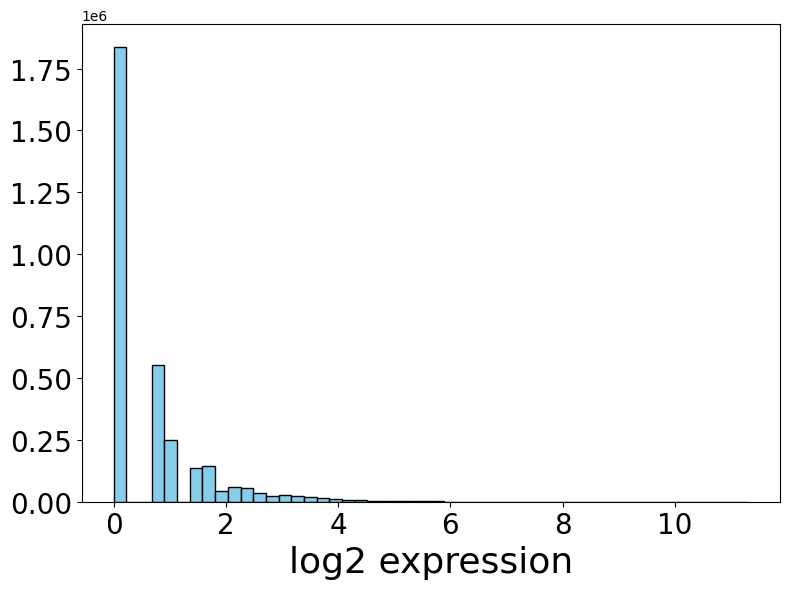

In [55]:
create_histogram_from_adata(
    adata,
    expression_key="X",
    bins=50,
    svg_output="histogram.svg",
    label_fontsize=26,
    tick_fontsize=20,
)